## Statistics Set 4

This notbeook is for practice using baseball data to render univariate and multivariant linear models.

## Univariate Linear Regression Model

Create a ULR model using some player stat to predict salary. 
Do the following:
1. With the baseball data linked above (some of it was explored in Statistics 4), create a univariate Linear Regression model predicting player salary using some player stat.
2. You will need to join a second table to the “Salaries.csv” table.
3. Cross-validate your model, and produce 68, 95, and 99.7% confidence intervals for your “slope”.
4. Report the R2R2 score for your univariate model.
5. Make a scatter plot of your data, with your model predictions overlaid in red.


## Import and Clean data

We import the two files of salary and batting stats and remove the batter stats that have NaN in a column so we can process later.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

baseball_dir = "lahman-csv_2015-01-24/"
salaries = pd.read_csv(baseball_dir + "Salaries.csv", sep=",")
batting = pd.read_csv(baseball_dir + "Batting.csv", sep=",")
batting.dropna(inplace=True)
batting.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58058 entries, 4560 to 99845
Data columns (total 22 columns):
playerID    58058 non-null object
yearID      58058 non-null int64
stint       58058 non-null int64
teamID      58058 non-null object
lgID        58058 non-null object
G           58058 non-null int64
AB          58058 non-null float64
R           58058 non-null float64
H           58058 non-null float64
2B          58058 non-null float64
3B          58058 non-null float64
HR          58058 non-null float64
RBI         58058 non-null float64
SB          58058 non-null float64
CS          58058 non-null float64
BB          58058 non-null float64
SO          58058 non-null float64
IBB         58058 non-null float64
HBP         58058 non-null float64
SH          58058 non-null float64
SF          58058 non-null float64
GIDP        58058 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 10.2+ MB


We are combining the two sheets by linking by player ID below and combines them into one giant table, then create a plot of all data points of batters who have hit at least one home run.

In [2]:
total_salaries = salaries.groupby(["playerID"])["salary"].sum()
total_batting = batting.groupby(["playerID"])[["HR", 'HBP', 'G','stint']].sum()

all_stats = pd.concat((total_batting, total_salaries), axis=1)
all_stats = all_stats[(all_stats.HR > 0) & (all_stats.salary > 0)]

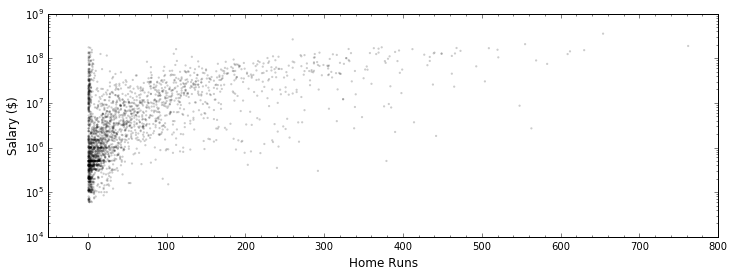

In [3]:
plt.figure(figsize=(12, 4))
plt.scatter(all_stats.HR, all_stats.salary, edgecolor="None",
            s=5, c='k', alpha=0.2)
plt.yscale("log")
plt.xlabel("Home Runs", fontsize=12); plt.ylabel("Salary ($)", fontsize=12)
plt.minorticks_on()
plt.xlim(-50, 800)
plt.show()

We are creating a linear regression univariate model to best fit our data points that takes the home runs as our 'x' input and salary as our 'y'.

In [4]:
from sklearn import linear_model
import sklearn.cross_validation as cv

kfolds = cv.KFold(len(all_stats), n_folds=10)

regressor = linear_model.LinearRegression()
Xvals = np.array(all_stats.HR)[:, np.newaxis]
yvals = np.array(all_stats.salary)

slopes, intercepts = [], []

for train_index, test_index in kfolds:
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    regressor.fit(X_train, y_train)
    slopes.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

slope = np.mean(slopes)
intercept = np.mean(intercepts)

regressor.coef_ = slope
regressor.intercept_ = intercept

print("Our model is:\n\tSalary = %.2f x N_HomeRuns + %.2f" % (slope, intercept))

Our model is:
	Salary = 179557.56 x N_HomeRuns + 2702208.34


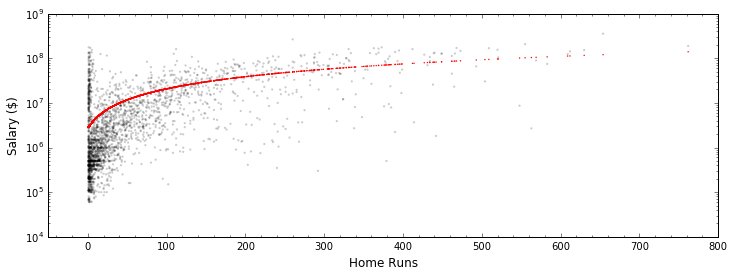

In [5]:
plt.figure(figsize=(12, 4))
plt.scatter(all_stats.HR, all_stats.salary, edgecolor="None",
            s=5, c='k', alpha=0.2)
plt.scatter(Xvals, regressor.predict(Xvals), edgecolor="None",
            s=2, c='r')
plt.yscale("log")
plt.xlabel("Home Runs", fontsize=12); plt.ylabel("Salary ($)", fontsize=12)
plt.minorticks_on()
plt.xlim(-50, 800)
plt.show()

Our r^2 value is .376 as seen below.

In [6]:
print("Score: {0}".format(regressor.score(Xvals, yvals)))

Score: 0.37611646407181426


## Multivariate Linear Regression Model

1. Using no more than 4 characteristics, create a multivariate Linear Regression model predicting player salary.
2. Report the R2R2 score for your multivariate model. Aim for R2>0.5R2>0.5.
3. Make a scatter plot of your data side-by-side with a scatter plot of your model predictions.

We have included the categories games, home runs, hit by pitcher, and stint for our four mulitvariant categories.

In [7]:
N_folds = 10
kfolds = cv.KFold(len(all_stats), n_folds=N_folds)

regressor = linear_model.LinearRegression()
valid_data = ["HR", 'HBP', 'G', 'stint']
Xvals = np.array(all_stats[valid_data])
yvals = np.array(all_stats.salary)

coeffs, intercepts = [], []

for train_index, test_index in kfolds:
    X_train, X_test = Xvals[train_index], Xvals[test_index]
    y_train, y_test = yvals[train_index], yvals[test_index]
    regressor.fit(X_train, y_train)
    coeffs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

coeffs = np.array(coeffs).mean(axis=0) #averages each column
intercept = np.array(intercepts).mean(axis=0)

regressor.coef_ = coeffs
regressor.intercept_ = intercept

Using these four categories we were able to get an r^2 value of .414 as seen below.

In [8]:
print("Score: {0}".format(regressor.score(Xvals, yvals)))

Score: 0.41481368292482745


Below gives us our model versus the actual data.

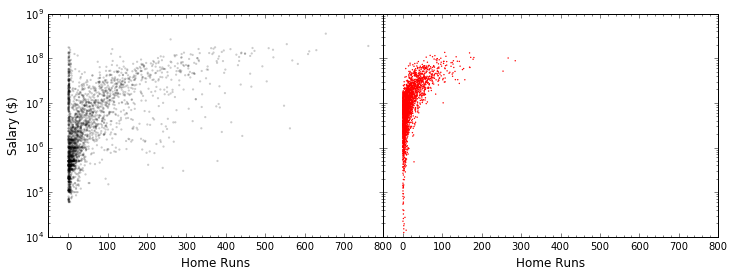

In [9]:
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(wspace=0)
ax = plt.subplot(121)
ax.scatter(all_stats.HR, all_stats.salary, edgecolor="None",
            s=5, c='k', alpha=0.2)
ax.set_yscale("log")
ax.set_xlabel("Home Runs", fontsize=12); ax.set_ylabel("Salary ($)", fontsize=12)
ax.set_xlim(-50, 800); ax.minorticks_on()

ax = plt.subplot(122)
ax.scatter(Xvals[:, 1], regressor.predict(Xvals), edgecolor="None",
            s=2, c='r')
ax.set_xlabel("Home Runs", fontsize=12)
ax.set_ylim(1E4, 1E9)
ax.set_yscale("log"); ax.set_yticklabels([])
ax.set_xlim(-50, 800); ax.minorticks_on()

plt.show()